# Business Understanding
Briefly restate the project’s purpose and goals.

Define the research/prediction question (e.g., “Can we predict a job’s salary based on location, company, and job title?”).

Describe why the problem is important or useful.

### Data Preview

In [15]:
# Panda dataframe here to showcase original data from csv

# Data Cleaning

### Variable Characterisation
- Have all fields defined in this block

### Handling Missing Data

In [16]:
# Code here to check for any missing values to address

Then explain any missing values in this cell and how to approach

In [17]:
# Then code here to handle missing values, if we have any. Follow TitanicDataCleaning.ipynb notes

# Data Exploration
This step includes Univariate, Bivariate, and Multivariate Analysis. Like CA1 but in code this time

### Univariate Analysis

In [18]:
# Univariate analysis

### Bivariate Analysis

In [19]:
# Bivariate analysis

### Multivariate Analysis

In [20]:
# Multivariate analysis

# Feature Engineering

### Response variable
- Explain that we're doing salary

### Variable Selection and Creation

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from dotenv import load_dotenv
import os

load_dotenv()

csv_path = os.getenv("CSV_PATHNAME") # To avoid conflicts with different pathnames

# Load data
data = pd.read_csv(csv_path)

# show data
data.info()
data.head()
print(data.describe())

# Check missing values
print("\nMissing Values:")
data.isnull().sum()

# Step #2: Drop variables not useful for modeling 
data.drop(['salary_currency', 'job_title', 'salary', 'employee_residence'], axis=1, inplace=True)

# Step 3: Construct New Variables if required
pd.get_dummies(data, drop_first=True)

top_6 = data['company_location'].value_counts().nlargest(6).index

data['company_location'] = np.where(data['company_location'].isin(top_6),
                                    data['company_location'],
                                    'Other')

data = pd.get_dummies(data, columns=['company_location'], drop_first=True)

data = pd.get_dummies(data, columns=['job_category'], drop_first=False)

data = pd.get_dummies(data, columns=['experience_level'], drop_first=True)

data = pd.get_dummies(data, columns=['employment_type'], drop_first=True)

data = pd.get_dummies(data, columns=['work_setting'], drop_first=True)

data = pd.get_dummies(data, columns=['company_size'], drop_first=True)

# Step 4: Scale Data if required


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB
         work_year         salary  salary_in_usd
count  9355.000000    9355.000000    9355.000000
mean   2022.760449  149927.981293  150299.495564
std       0.519470   6

Then explain why we created/removed some

### Importance and Multicolinearity

                                             work_year  salary_in_usd  \
work_year                                     1.000000       0.166003   
salary_in_usd                                 0.166003       1.000000   
company_location_France                      -0.101670      -0.081180   
company_location_Germany                     -0.135995      -0.082527   
company_location_Other                       -0.175109      -0.220717   
company_location_Spain                       -0.056384      -0.165179   
company_location_United Kingdom              -0.023530      -0.162969   
company_location_United States                0.192920       0.320795   
job_category_BI and Visualization             0.076648      -0.044787   
job_category_Cloud and Database              -0.007143       0.001721   
job_category_Data Analysis                   -0.023253      -0.284148   
job_category_Data Architecture and Modeling   0.007580       0.015233   
job_category_Data Engineering                -0.047

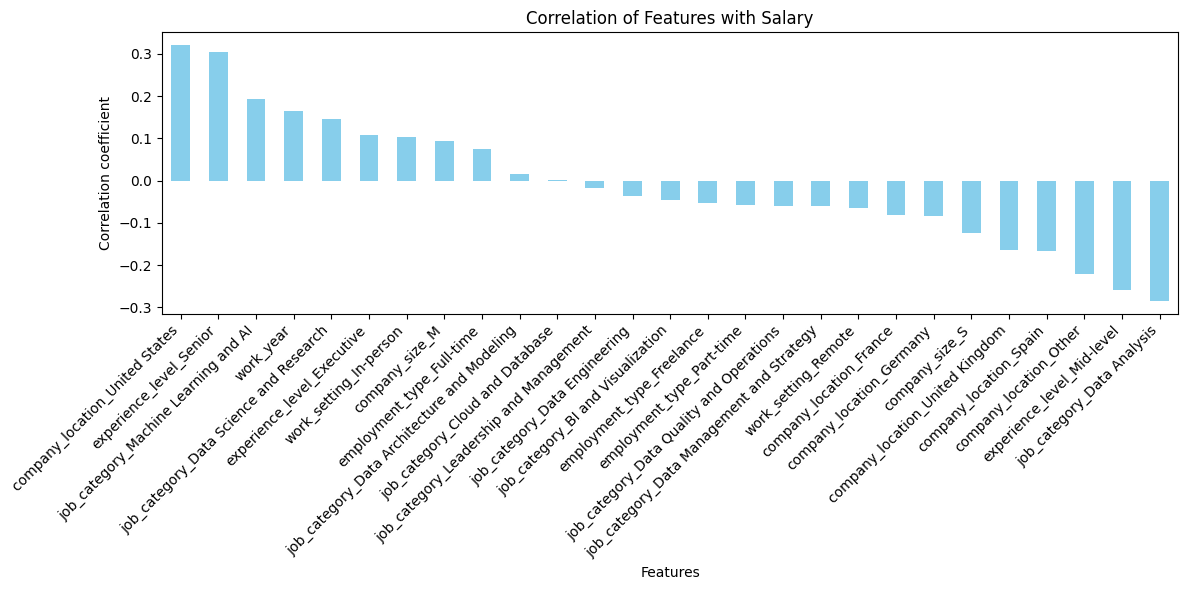

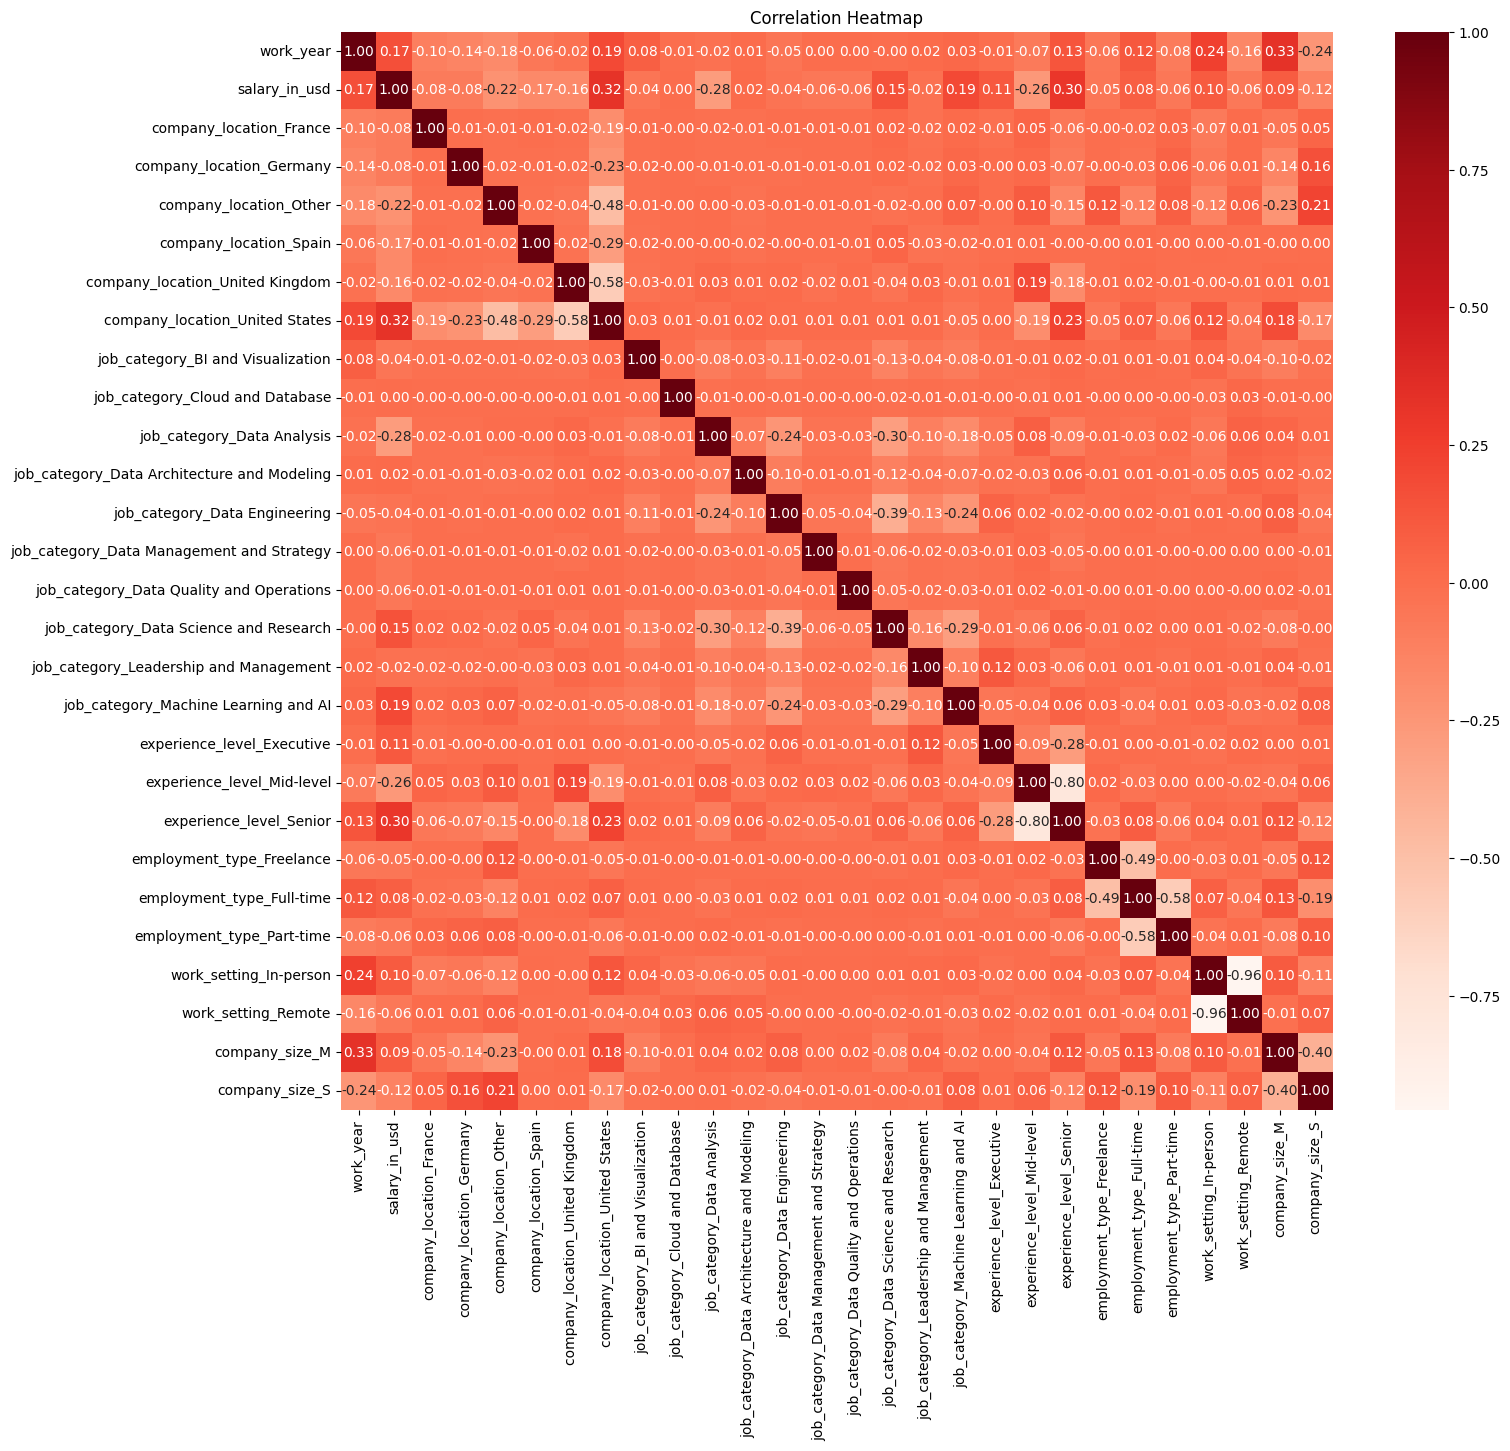

In [ ]:
# Step 5: Importance & Multicolinearity 

corrVals = data.corr()
print(corrVals)

# Compute correlation with target
target_corr = data.corr()['salary_in_usd'].drop('salary_in_usd')  # drop self-correlation

# Sort correlations
target_corr = target_corr.sort_values(ascending=False)

# Plot as bar chart
plt.figure(figsize=(12,6))
target_corr.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Salary")
plt.ylabel("Correlation coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Correlations
plt.figure(figsize=(16, 14))
sns.heatmap(data.corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Then explain output

# Predictive Modelling
State what we will use. Best to follow notes

# Findings
Summarize main results and conclusions.

Highlight key visualizations that support findings.

Connect insights back to your original business question.

Discuss limitations and possible improvements.

Probably best to split above 4 into 4 separate blocks

# Team Contributions

### Theo's Contributions
- Provided basic code to extract data from Jobs.ie and export it to a csv file
- Created initial template for both DataMining and DataAnalyses files 

### Oisín's Contributions
- Created README.md file to explain project
- Researched potential websites to use for project